In [1]:
%matplotlib inline

In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [3]:
420.9687/np.pi

133.99849898393833

In [4]:
def schwefel(x, y):
    return x*np.sin(np.sqrt(np.abs(x))) + y*np.sin(np.sqrt(np.abs(y)))

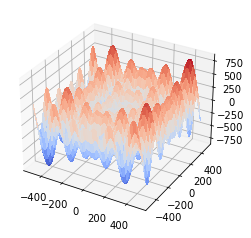

In [33]:
r = 500
x = np.linspace(-r, r, 100)
y = np.linspace(-r, r, 100)
X, Y = np.meshgrid(x, y)
Z = schwefel(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [5]:
def contour_schwefel(r, levels=20):
    x = np.linspace(-r, r, 100)
    y = np.linspace(-r, r, 100)
    X, Y = np.meshgrid(x, y)
    Z = schwefel(X, Y)
    
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=levels)
    plt.colorbar()

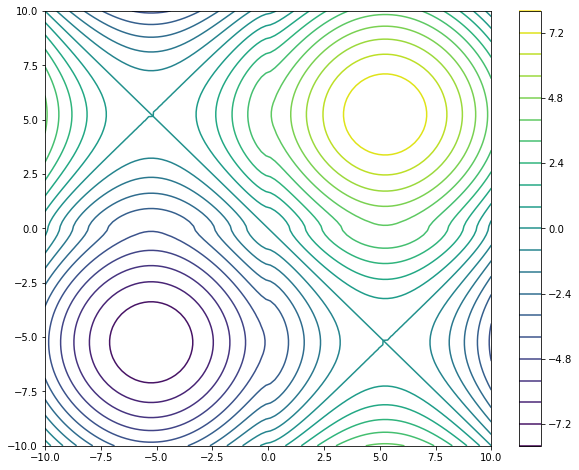

In [6]:
r = 10
contour_schwefel(r)

In [7]:
from scipy.optimize import minimize_scalar

In [8]:
res = minimize_scalar(lambda x: -schwefel(x, x), bounds=[1, r], method="bounded")
print(res)

     fun: -7.890603250568612
 message: 'Solution found.'
    nfev: 8
     nit: 8
  status: 0
 success: True
       x: 5.239199620797594


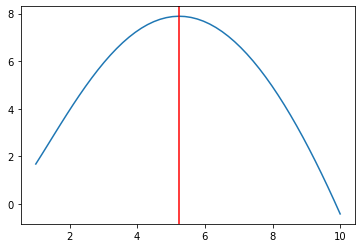

In [9]:
xs = np.linspace(1, r, 50)
ys = schwefel(xs, xs)
plt.plot(xs, ys)
plt.axvline(res.x, color="red")

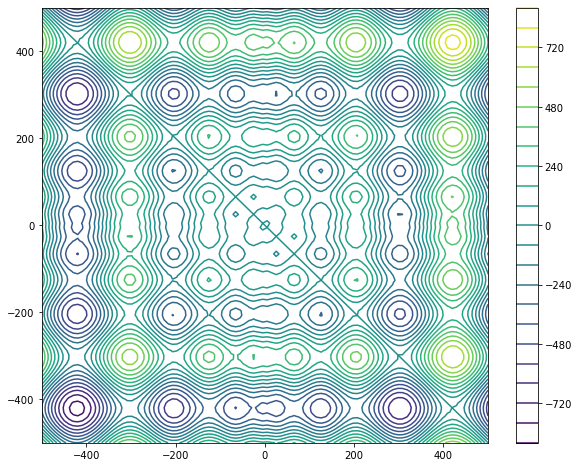

In [10]:
contour_schwefel(500)

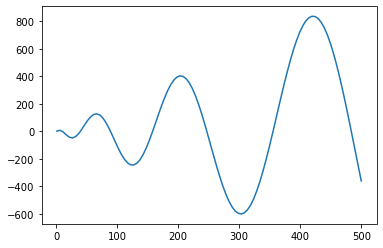

In [11]:
xs = np.linspace(1, 500, 100)
ys = schwefel(xs, xs)
plt.plot(xs, ys)

In [12]:
res = minimize_scalar(lambda x: -schwefel(x, x), bounds=[300, 500], method="bounded")
print(res)

     fun: -837.9657745448652
 message: 'Solution found.'
    nfev: 9
     nit: 9
  status: 0
 success: True
       x: 420.96874342720685


In [13]:
def schwefel_crosscut(offset, ts):
    xs = offset + ts
    ys = offset - ts
    return schwefel(xs, ys)

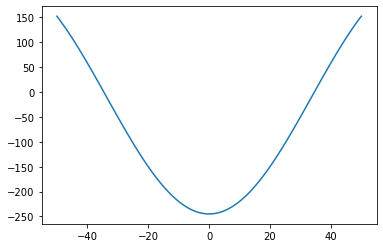

In [14]:
ts = np.linspace(-50, 50, 100)
ys = schwefel_crosscut(123, ts)
plt.plot(ts, ys)

In [15]:
from scipy.optimize import root_scalar

In [16]:
def objective(x):
    return np.tan(np.sqrt(x)) + np.sqrt(x)/2

def d_objective(x):
    return (1/np.cos(x)**2 + 1/2)/2/np.sqrt(x)

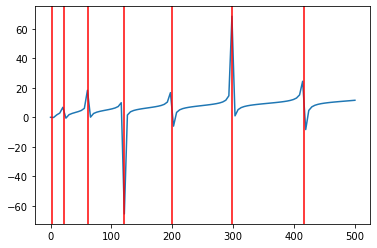

In [17]:
xs = np.linspace(0, 500, 100)
ys = objective(xs)
plt.plot(xs, ys)
for k in range(0, 7):
    plt.axvline((np.pi*(k+1/2))**2, color='red') # approximate zeros

In [18]:
def error(k):
    approx = (np.pi*(k+1/2))**2
    res = root_scalar(objective, x0=0.95*approx, method="newton", fprime=d_objective)
    return approx, res.root

In [19]:
error(4)

/var/folders/1y/kwtrqbyd3dqfm_yfnx75n9jr0000gn/T/ipykernel_49980/815492672.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(np.sqrt(x)) + np.sqrt(x)/2
/var/folders/1y/kwtrqbyd3dqfm_yfnx75n9jr0000gn/T/ipykernel_49980/815492672.py:2: RuntimeWarning: invalid value encountered in tan
  return np.tan(np.sqrt(x)) + np.sqrt(x)/2
/var/folders/1y/kwtrqbyd3dqfm_yfnx75n9jr0000gn/T/ipykernel_49980/815492672.py:5: RuntimeWarning: invalid value encountered in sqrt
  return (1/np.cos(x)**2 + 1/2)/2/np.sqrt(x)


(199.8594891220595, nan)

In [20]:
from scipy.optimize import fixed_point

In [27]:
def find_optimum(k, xtol=1e-8):
    
    def fp_func(z, k):
        return -np.arctan((z+k*np.pi)/2)
    
    sol = fixed_point(fp_func, 0, args=(k,), xtol=xtol)
    return float(sol), (float(sol) + k*np.pi)**2

In [22]:
xs = np.array([find_optimum(k, xtol=1e-12) for k in range(1, 8)])
xs

array([  5.2391993 ,  25.87741735,  65.54786509, 124.82935642,
       203.81425265, 302.52493561, 420.96874636])

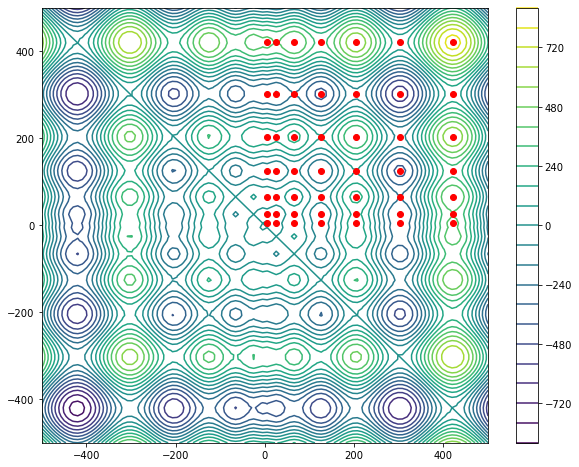

In [23]:
X, Y = np.meshgrid(xs, xs)

contour_schwefel(500)
plt.plot(X.ravel(), Y.ravel(), 'ro')

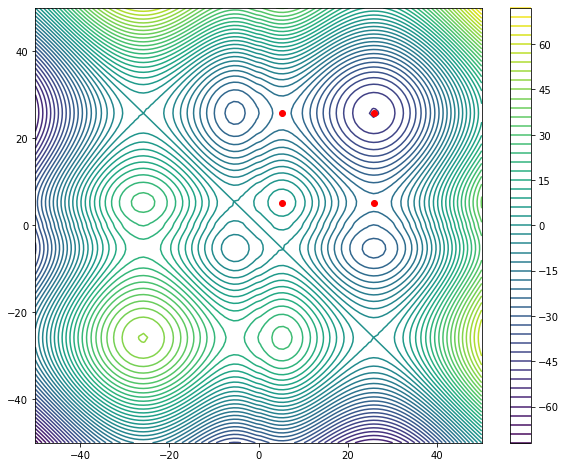

In [24]:
X, Y = np.meshgrid(xs[:2], xs[:2])

contour_schwefel(50, levels=50)
plt.plot(X.ravel(), Y.ravel(), 'ro')

In [28]:
find_optimum(7, xtol=1e-16)

(-1.4736256651868649, 420.96874635998194)